<a href="https://colab.research.google.com/github/jeanferuzi-oss/portafolio/blob/etapa-1/Etapa_1_oficial_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de Dependencias
Se utiliza wbgapi para la consulta de bases de datos internacionales.

In [2]:
%pip install wbgapi

# Integración con Google Drive
El proyecto está diseñado para trabajar con archivos persistentes y módulos externos alojados en la nube.

Acción: Montaje de /content/drive.

Seguridad: El script detecta de forma automática si la unidad ya está montada para evitar redundancias y errores de conexión.

# Gestión de Entorno y Almacenamiento en la Nube

Para garantizar la persistencia de los datos y el uso de lógica modular, el sistema integra Google Drive como almacenamiento principal. Esto permite separar las funciones auxiliares del flujo principal del cuaderno.

**Google Drive:** Se utiliza para importar el módulo personalizado myfuc.

**Wbgapi:** Herramienta clave para la conexión directa con el Banco Mundial.

In [3]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/myfuc')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Definición de Variables y Descarga por Bloques (Chunking)
Se definen más de 50 indicadores clave (PIB, salud, educación). Debido al volumen de información, se utiliza una técnica de Chunking para segmentar la descarga en bloques, evitando así tiempos de espera excesivos o errores de conexión con la API.

In [4]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [5]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

# Filtrado y Estandarización mediante Códigos ISO
Un paso crítico en la limpieza de datos es distinguir entre "países" y "regiones geográficas". El Banco Mundial mezcla ambos en su API. Para este análisis, implementamos un filtro basado en los estándares ISO.

**Identificación:** Usamos wb.economy.info() para extraer los metadatos.

**Filtrado:** Discriminamos todas las filas donde la columna aggregate es verdadera, manteniendo únicamente los países soberanos.

In [6]:
# Seleccionar solamente paises usando código ISO

import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

df_wb_raw.head(20)

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775000,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349000,63.936,2.3,16.8,NaN,NaN,33.0000
3,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170000,59.691,NaN,NaN,86.2802,86.9849,86.6377
5,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588000,69.877,98.7,99.4,75.8894,80.3200,78.0800
7,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477000,69.445,9.0,52.3,NaN,NaN,45.7313
8,UZB,Uzbekistan,3.567971e+11,2.021146,35652307.0,17670093.0,49.562271,17982214.0,50.437729,2.044174,...,46.465933,45.087905,75.401,72.388000,69.450,70.9,96.8,87.1292,90.9056,89.0136
9,URY,Uruguay,1.052313e+11,-0.083552,3388081.0,1745071.0,51.506177,1643010.0,48.493823,-0.035149,...,101.562689,59.210384,81.920,78.138000,74.192,100.0,100.0,NaN,NaN,89.8960
10,USA,United States,2.497712e+13,0.831493,336806231.0,167569583.0,49.752519,169236648.0,50.247481,0.880291,...,NaN,NaN,81.100,78.385366,75.800,100.0,100.0,NaN,NaN,93.1444
11,GBR,United Kingdom,3.602178e+12,1.304980,68492000.0,34773417.0,50.770041,33718583.0,49.229959,1.406999,...,93.725319,67.925537,83.208,81.238098,79.362,100.0,100.0,NaN,NaN,96.2988
12,ARE,United Arab Emirates,7.363772e+11,3.977171,10483751.0,3772859.0,35.987679,6710892.0,64.012321,4.156316,...,70.177767,54.315438,84.204,82.909000,81.978,100.0,100.0,100.0000,100.0000,100.0000


In [7]:
# Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

# Verificación y Estandarización Final
Finalmente, validamos la estructura del DataFrame resultante. El dataset final contiene 67 columnas (indicadores) para cada país, listo para la etapa de análisis exploratorio.

In [8]:
# Visualización de los datos
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


In [9]:
# Cambio de nombre de nuestro data
df_wb = df_wb_raw

# Chequeo de Salud (Sanity Check)

El chequeo inicial es fundamental porque permite identificar inconsistencias técnicas (como formatos erróneos) que bloquean el procesamiento de datos. Ayuda a detectar sesgos por valores nulos, asegurando que los resultados sean representativos y no producto de una muestra vacía. Además, previene errores de ejecución (como el AssertionError) al garantizar la integridad de los tipos de datos antes de aplicar algoritmos. Finalmente, permite limpiar el ruido visual de variables irrelevantes, transformando un dataset "sucio" en una base sólida para cualquier informe profesional.

In [10]:
# Muestra qué tipo de dato es cada columna y cuántos datos "No Nulos" hay
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SP.POP.GROW              198 non-null    float64
 4   SP.POP.TOTL              198 non-null    float64
 5   SP.POP.TOTL.FE.IN        198 non-null    float64
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64
 7   SP.POP.TOTL.MA.IN        198 non-null    float64
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64
 9   SP.URB.GROW              198 non-null    float64
 10  SP.URB.TOTL              198 non-null    float64
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64
 12  SL.TLF.TOTL.FE.ZS        173 non-null    float64
 13  SL.TLF.TOTL.IN           173 non-null    float64
 14  SL.UEM.TOTL.FE.NE.ZS     1

#Análisis del primer chequeo


Tras realizar el primer chequeo exploratorio mediante la función df.info(), se han detectado inconsistencias críticas que requieren una fase de pre-procesamiento inmediata. El DataFrame actual presenta una estructura de 198 observaciones y 67 variables, pero su integridad técnica está comprometida por los siguientes hallazgos:





**Integridad de los Datos (Datos vacios)**







El dataset se encuentra en un estado "sucio", con una pérdida de información significativa que afectaría cualquier análisis estadístico posterior:



**Columnas Nulas:** Las variables de educación (SE.PRM.NENR, SE.PRM.NENR.FE, SE.PRM.NENR.MA) presentan un 0% de completitud. Al no contener registros, deben ser descartadas.



Sesgo por Vacíos: Los indicadores de impuestos y deuda externa solo cuentan con aproximadamente 34 registros. Trabajar con ellas implicaría perder el 85% de la muestra si se aplica una eliminación por filas.



Estabilidad en Empleo: Las variables de mercado laboral muestran una mejor salud con 173 datos, representando una pérdida aceptable del 12%.





**Redundancia de Identificadores**









Se observa una duplicidad estructural en la columna de identidad geográfica (country vs Country). Esto suele ser producto de un merge mal ejecutado o un error en la fuente de origen. Es imperativo unificar estas columnas para evitar ruido en las agrupaciones.



#Cuantificación de Datos Faltantes
Calcula y ordena el porcentaje de nulos por columna para identificar brechas críticas de información en el dataset. Permite priorizar la eliminación de variables con baja representatividad, garantizando la robustez técnica de los análisis posteriores.

In [11]:
# Muestra el porcentaje de nulos por cada columna, ordenado de mayor a menor
nulos = df_wb.isna().mean().sort_values(ascending=False) * 100
nulos

,0
SE.PRM.NENR.FE,100.000000
SE.PRM.NENR.MA,100.000000
SE.PRM.NENR,100.000000
GC.TAX.EXPT.ZS,83.333333
GC.TAX.EXPT.CN,83.333333
...,...
SP.POP.TOTL.MA.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.DYN.LE00.MA.IN,0.000000
SP.DYN.LE00.FE.IN,0.000000


#Análisis de Calidad de Datos


El resultado muestra un ranking de valores nulos por columna, lo que nos permite identificar la viabilidad de cada variable para el modelo:

**Pérdida Total (100%):** Las variables de educación primaria (SE.PRM.NENR...) están completamente vacías. No aportan ninguna variabilidad al análisis y deben ser eliminadas de inmediato.

**Pérdida Crítica (~85%):** Los indicadores de impuestos (GC.TAX.EXPT...) presentan una ausencia de datos masiva. Utilizarlas reduciría drásticamente el tamaño de nuestra muestra efectiva.

**Integridad Óptima (0%):** Las variables demográficas de población y esperanza de vida (SP.POP... y SP.DYN...) están completas. Estos serán los pilares sólidos de nuestro análisis.

# La omisión del análisis descriptivo global (.describe())

In [12]:
# Revisión de las medidas descriptivas.
df_wb.describe().T

,count,mean,std,min,25%,50%,75%,max
NY.GDP.MKTP.PP.KD,198.0,8.388712e+11,3.129922e+12,5.705451e+07,2.586691e+10,8.596764e+10,4.615291e+11,3.200488e+13
SP.POP.GROW,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
SP.POP.TOTL.FE.IN,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
...,...,...,...,...,...,...,...,...
EG.CFT.ACCS.RU.ZS,182.0,6.227115e+01,4.132452e+01,0.000000e+00,1.106250e+01,8.415000e+01,1.000000e+02,1.000000e+02
EG.CFT.ACCS.UR.ZS,182.0,7.850110e+01,3.239499e+01,1.000000e-01,6.965000e+01,9.760000e+01,1.000000e+02,1.000000e+02
IT.NET.USER.FE.ZS,57.0,8.719026e+01,1.377467e+01,1.669710e+01,8.478650e+01,8.982900e+01,9.440630e+01,1.000000e+02
IT.NET.USER.MA.ZS,57.0,8.824051e+01,1.254217e+01,1.949730e+01,8.610880e+01,9.053830e+01,9.510000e+01,1.000000e+02


# La omisión del análisis descriptivo global (.describe())

La omisión del análisis descriptivo global (.describe()) se fundamenta en cuatro pilares críticos que comprometen la calidad de la interpretación:

**Legibilidad Crítica**: El uso de notación científica en los resultados oscurece las magnitudes reales de los datos, dificultando la identificación visual de valores atípicos (outliers) o errores de medición.


**Inviabilidad por Dimensionalidad:** La presencia de 64 columnas genera una fragmentación visual en el entorno de Colab, lo que impide realizar un análisis relacional coherente entre las medidas de tendencia central y su dispersión.


**Incoherencia Metodológica de Escalas:** La coexistencia de unidades heterogéneas (porcentajes vs. millones) invalida la comparación directa de la desviación estándar, induciendo a conclusiones erróneas sobre la variabilidad real de las variables.


**Variables nulos**: La inclusión de variables con un 80% a 100% de nulos entrega estadísticas carentes de representatividad, creando un sesgo de información sobre una muestra que no es estadísticamente válida.

#Trascendencia del Mapeo Semántico y Diccionario de Variables

1. Esta operación representa el paso crítico de traducción de metadatos, donde se transforman los códigos crípticos del Banco Mundial en un lenguaje de negocio e investigación legible. El proceso se profundiza en tres niveles estratégicos:

2. Humanización y Legibilidad: Se reemplazan identificadores técnicos alfanuméricos (como NY.GDP.MKTP.PP.KD) por nombres intuitivos como PIB_PPP. Esto permite que cualquier analista o lector del informe comprenda la naturaleza de las variables de forma inmediata, eliminando la dependencia de manuales técnicos externos.

3. Taxonomía por Dimensiones: El diccionario organiza la información en clústeres temáticos (Población, Salud, Empleo, Macroeconomía y Tecnología). Esta categorización facilita el análisis multivariado, permitiendo al investigador agrupar indicadores por su naturaleza, como separar variables de stock poblacional de las de tasas de crecimiento (_GROW).

4. Estandarización de Unidades: Mediante el uso de sufijos normalizados (_Pct para porcentajes, _USD para dólares y _LCU para moneda local), se establece una convención de nombres robusta. Esta práctica previene errores de interpretación durante la fase de visualización y modelado, asegurando que se comparen magnitudes bajo la misma escala métrica.

In [13]:
# Diccionario  de renombramiento
nuevos_nombres = {
    # Identificadores y Economía (PIB)
    'NY.GDP.MKTP.PP.KD': 'PIB_PPP',
    'GE.EST': 'Efectividad_Gobierno',
    'FP.CPI.TOTL.ZG': 'Inflacion_Anual',
    'NE.EXP.GNFS.ZS': 'Exportaciones_Pct_PIB',
    'BM.KLT.DINV.CD.WD': 'IED_Salida_Neta',
    'BX.KLT.DINV.WD.GD.ZS': 'IED_Entrada_Pct_PIB',

    # Población General
    'SP.POP.TOTL': 'Poblacion_Total',
    'SP.POP.GROW': 'Crecimiento_Poblacional',
    'SP.POP.TOTL.FE.IN': 'Poblacion_Mujeres',
    'SP.POP.TOTL.FE.ZS': 'Poblacion_Mujeres_Pct',
    'SP.POP.TOTL.MA.IN': 'Poblacion_Hombres',
    'SP.POP.TOTL.MA.ZS': 'Poblacion_Hombres_Pct',

    # Población Urbana y Rural
    'SP.URB.TOTL': 'Poblacion_Urbana',
    'SP.URB.GROW': 'Crecimiento_Pob_Urbana',
    'SP.URB.TOTL.IN.ZS': 'Poblacion_Urbana_Pct',
    'SP.RUR.TOTL': 'Poblacion_Rural',
    'SP.RUR.TOTL.ZG': 'Crecimiento_Pob_Rural',
    'SP.RUR.TOTL.ZS': 'Poblacion_Rural_Pct',

    # Esperanza de Vida
    'SP.DYN.LE00.IN': 'Esperanza_Vida_Total',
    'SP.DYN.LE00.FE.IN': 'Esperanza_Vida_Mujeres',
    'SP.DYN.LE00.MA.IN': 'Esperanza_Vida_Hombres',

    # Empleo y Desempleo
    'SL.TLF.TOTL.IN': 'Fuerza_Laboral_Total',
    'SL.TLF.TOTL.FE.ZS': 'Fuerza_Laboral_Mujeres_Pct',
    'SL.UEM.TOTL.ZS': 'Desempleo_Total_Pct',
    'SL.UEM.TOTL.FE.ZS': 'Desempleo_Mujeres_Pct',
    'SL.UEM.TOTL.MA.ZS': 'Desempleo_Hombres_Pct',

    # Sectores Económicos (Valor Agregado)
    # Suffix _USD para Dólares y _LCU para Moneda Local
    'NV.AGR.TOTL.CD': 'Valor_Agro_USD',
    'NV.AGR.TOTL.CN': 'Valor_Agro_LCU',
    'NV.IND.MANF.CD': 'Valor_Manufactura_USD',
    'NV.IND.MANF.CN': 'Valor_Manufactura_LCU',
    'NV.IND.TOTL.CD': 'Valor_Industria_USD',
    'NV.IND.TOTL.CN': 'Valor_Industria_LCU',
    'NV.SRV.TOTL.CD': 'Valor_Servicios_USD',
    'NV.SRV.TOTL.CN': 'Valor_Servicios_LCU',

    # Tecnología y Medio Ambiente
    'IT.NET.USER.ZS': 'Uso_Internet_Pct',
    'EN.GHG.CO2.IP.MT.CE.AR5': 'Emisiones_CO2_Ind',
    'EG.CFT.ACCS.ZS': 'Acceso_Cocina_Limpia_Total_Pct',
    'EG.CFT.ACCS.RU.ZS': 'Acceso_Cocina_Limpia_Rural_Pct',
    'EG.CFT.ACCS.UR.ZS': 'Acceso_Cocina_Limpia_Urbano_Pct'
}

# Aplicamos el cambio de nombre
df_wb = df_wb.rename(columns=nuevos_nombres)

df_wb.head()

,country,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,Uso_Internet_Pct
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


#Consolidación de Variables y Arquitectura de Datos
El índice final representa un ecosistema de 41 indicadores normalizados que integran dimensiones macroeconómicas, demográficas, laborales y de sostenibilidad. Esta estructura elimina la ambigüedad técnica de los códigos originales, permitiendo correlacionar variables.

In [14]:
# Revisión de los nombres de las columnas
df_wb.columns

Index(['country', 'Country', 'PIB_PPP', 'Crecimiento_Poblacional',
       'Poblacion_Total', 'Poblacion_Mujeres', 'Poblacion_Mujeres_Pct',
       'Poblacion_Hombres', 'Poblacion_Hombres_Pct', 'Crecimiento_Pob_Urbana',
       'Poblacion_Urbana', 'Poblacion_Urbana_Pct',
       'Fuerza_Laboral_Mujeres_Pct', 'Fuerza_Laboral_Total',
       'SL.UEM.TOTL.FE.NE.ZS', 'Desempleo_Mujeres_Pct', 'SL.UEM.TOTL.MA.NE.ZS',
       'Desempleo_Hombres_Pct', 'SL.UEM.TOTL.NE.ZS', 'Poblacion_Rural',
       'Crecimiento_Pob_Rural', 'Poblacion_Rural_Pct', 'Inflacion_Anual',
       'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG',
       'NE.EXP.GNFS.KN', 'Exportaciones_Pct_PIB', 'Valor_Agro_USD',
       'Valor_Agro_LCU', 'Valor_Manufactura_USD', 'Desempleo_Total_Pct',
       'Efectividad_Gobierno', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS',
       'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'Valor_Manufactura_LCU',
       'Valor_Industria_USD', 'Valor_Industria_LCU', 'Valor_Servicios_USD',
       'Valor_Servicios_LCU'

# Normalización Técnica de Identificadores y Reindexación Correlativa
Este bloque de código ejecuta la organización final de la estructura del dataset, asegurando que la navegación por los datos sea lógica, estandarizada y apta para reportes profesionales:

**Estandarización de la Llave Primaria:** Al renombrar la columna country a Iso, se asigna una identidad técnica precisa a la variable. Esto diferencia claramente los códigos internacionales (ISO 3166-1 alpha-3) del nombre común del país, eliminando ambigüedades en el manejo de metadatos.

**Consistencia Geo-Alfabética:** El ordenamiento mediante sort_values bajo el criterio Iso garantiza que el dataset posea una secuencia predecible y profesional. Esta práctica es fundamental para facilitar cruces de datos (joins) posteriores y para realizar auditorías visuales rápidas de la información.

**Optimización del Índice para Lectura Humana:** La combinación de reset_index(drop=True) y el ajuste index + 1 transforma una secuencia numérica fragmentada por procesos de limpieza previos en un contador continuo y natural. Esto permite que el índice del DataFrame actúe como un ranking o numeración oficial de las observaciones, facilitando la referencia de filas en informes ejecutivos.

In [15]:
# Estandarización del identificador ISO, ordenamiento alfabético y reindexación secuencial iniciando en uno.
df_wb = df_wb.rename(columns={'country': 'Iso'})

df_wb.sort_values(by='Iso', inplace=True)
df_wb.reset_index(drop=True, inplace=True)

df_wb.index = df_wb.index + 1

df_wb.head()

,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,Uso_Internet_Pct
1,ABW,Aruba,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,NaN,NaN,78.779,76.353,73.702,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,NaN,NaN,67.536,66.035,64.467,20.4,87.0,NaN,NaN,17.7089
3,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,9.933616,10.165600,67.144,64.617,62.099,8.4,75.0,NaN,NaN,44.7581
4,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,77.031527,52.749937,81.446,79.602,77.728,72.5,95.2,81.7239,84.59,83.1356
5,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,68.003820,57.193764,86.107,84.041,82.100,100.0,100.0,NaN,NaN,95.4456


# Refinamiento de la Estructura de Datos: Selección de Atributos y Normalización Estadística

Este proceso representa la etapa de curaduría técnica, donde transformamos un dataset crudo en uno listo para modelos econométricos o de Machine Learning, siguiendo cuatro pilares fundamentales:

1. Filtrado por Representatividad (Feature Selection): Se aplicó una regla de integridad rígida eliminando variables con más del 15% de valores faltantes. Técnicamente, esto asegura que las variables retenidas posean suficiente varianza y densidad de datos para ser estadísticamente significativas, evitando que indicadores muy incompletos (como impuestos o deuda) sesguen el análisis global.

2. Imputación Robusta mediante la Mediana: Para las variables que sobrevivieron al filtro (aquellas con nulos mínimos), se realizó una imputación de valores faltantes utilizando la mediana. A diferencia de la media, la mediana es una medida de tendencia central robusta ante valores atípicos (outliers), lo que garantiza que países con datos extremos no distorsionen los valores reemplazados en variables como inflación o empleo.

3. Normalización y Ordenamiento Geo-técnico: Se estandarizó el flujo de lectura mediante un ordenamiento alfabético basado en el código ISO. Esto permite una indexación predecible y facilita futuros cruces de datos con otras fuentes internacionales que utilicen el estándar ISO 3166-1 alpha-3 como llave primaria.

4. Reestructuración de Índices (Human-Centric Indexing): Se realizó un reset del índice para eliminar la secuencia original fragmentada por la limpieza. Al establecer un inicio correlativo desde 1.

In [16]:
# Limpieza de nulos, imputación inteligente mediante KNN y reordenamiento final del dataset.
umbral = 0.15
porcentaje_nulos = df_wb.isna().mean()

columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index

df_wb.drop(columns=columnas_a_eliminar, inplace=True, errors="ignore")

from sklearn.impute import KNNImputer

columnas_numericas = df_wb.select_dtypes(include="number").columns
imputer = KNNImputer(n_neighbors=5, weights="distance")
df_wb[columnas_numericas] = imputer.fit_transform(df_wb[columnas_numericas])

df_wb.sort_values(by="Iso", inplace=True)
df_wb.reset_index(drop=True, inplace=True)
df_wb.index = df_wb.index + 1

df_wb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 1 to 198
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Iso                              198 non-null    object 
 1   Country                          198 non-null    object 
 2   PIB_PPP                          198 non-null    float64
 3   Crecimiento_Poblacional          198 non-null    float64
 4   Poblacion_Total                  198 non-null    float64
 5   Poblacion_Mujeres                198 non-null    float64
 6   Poblacion_Mujeres_Pct            198 non-null    float64
 7   Poblacion_Hombres                198 non-null    float64
 8   Poblacion_Hombres_Pct            198 non-null    float64
 9   Crecimiento_Pob_Urbana           198 non-null    float64
 10  Poblacion_Urbana                 198 non-null    float64
 11  Poblacion_Urbana_Pct             198 non-null    float64
 12  Fuerza_Laboral_Mujeres

In [17]:
# Visualización del resultado
df_wb.head()

,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
1,ABW,Aruba,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,5.487612e+07,-3.584591,0.002100,89.721279,78.779,76.353,73.702,79.944614,97.325128,76.356041
2,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,0.000000e+00,0.000000,0.093100,38.600000,67.536,66.035,64.467,20.400000,87.000000,17.708900
3,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.797700,50.200000,67.144,64.617,62.099,8.400000,75.000000,44.758100
4,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.818600,86.100000,81.446,79.602,77.728,72.500000,95.200000,83.135600
5,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,0.002405,100.000000,86.107,84.041,82.100,100.000000,100.000000,95.445600


Tras el proceso de saneamiento y curaduría de datos, el DataFrame final presenta una estructura de 198 observaciones y 41 variables con un 100% de completitud en cada una de sus dimensiones. Se logró eliminar la redundancia de identificadores y filtrar las variables con baja densidad de información, garantizando un dataset robusto para el análisis estadístico sin pérdida de representatividad geográfica

In [18]:
# Generamos la tabla transpuesta de describe().T
stats = df_wb.describe().T[['mean', '50%', 'std', 'min', 'max']]

stats.columns = ['Media', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']

stats.style.format("{:,.2f}")

,Media,Mediana,Desviación Estándar,Mínimo,Máximo
PIB_PPP,"838,871,240,077.62","85,967,640,784.20","3,129,921,929,150.23","57,054,510.99","32,004,884,803,945.30"
Crecimiento_Poblacional,1.15,1.11,1.58,-8.42,6.53
Poblacion_Total,"39,996,113.09","7,335,048.50","148,495,681.87","9,816.00","1,438,069,596.00"
Poblacion_Mujeres,"19,877,755.27","3,672,053.50","72,528,404.70","4,795.00","696,186,332.00"
Poblacion_Mujeres_Pct,49.97,50.33,2.99,28.48,54.92
Poblacion_Hombres,"20,118,357.81","3,560,819.50","75,980,559.69","5,021.00","741,883,264.00"
Poblacion_Hombres_Pct,50.03,49.67,2.99,45.08,71.52
Crecimiento_Pob_Urbana,1.73,1.52,1.83,-8.35,8.11
Poblacion_Urbana,"22,896,741.02","4,463,172.50","80,190,575.27","6,283.00","924,440,306.00"
Poblacion_Urbana_Pct,62.21,63.62,22.72,15.06,100.00


#Conclusiones del Análisis Descriptivo

A partir de la tabla de estadísticos descriptivos, se identifican varias áreas clave con alta relevancia económica y social a nivel país. En el ámbito del tamaño y desempeño económico, el PIB en paridad de poder de compra es una de las variables centrales. Presenta una media muy superior a la mediana y una desviación estándar extremadamente elevada, lo que evidencia una fuerte asimetría y una alta concentración del producto en un número reducido de economías grandes. Esto sugiere que la mediana es más representativa del país típico y que la variable debería transformarse (por ejemplo, en logaritmos) para análisis comparativos. En la dimensión demográfica, la población total muestra un patrón similar, con una gran dispersión y diferencias estructurales profundas entre países pequeños y economías muy pobladas. En contraste, el crecimiento poblacional presenta una media y mediana cercanas, aunque con valores extremos negativos y positivos, reflejando realidades demográficas divergentes. En cuanto a la estructura territorial, el porcentaje de población urbana destaca como un indicador clave del nivel de desarrollo, con una dispersión amplia que separa economías mayoritariamente rurales de países altamente urbanizados. El crecimiento de la población urbana, superior al rural en promedio, confirma el proceso global de urbanización. En el mercado laboral, la tasa de desempleo total es una variable relevante por su impacto macroeconómico y social, con una distribución asimétrica y valores máximos elevados que reflejan episodios de crisis severas en ciertos países. La inflación anual es otro indicador macroeconómico central, caracterizado por una media muy superior a la mediana y una desviación estándar alta, lo que revela la presencia de episodios de inflación extrema o hiperinflación que distorsionan el promedio. En el ámbito de la apertura y la inserción internacional, las exportaciones como porcentaje del PIB muestran una gran heterogeneidad, desde economías relativamente cerradas hasta países muy abiertos o especializados en reexportación. En la dimensión institucional, la efectividad del gobierno resulta especialmente informativa, ya que es un indicador estandarizado, con distribución relativamente equilibrada y alto poder explicativo para diferencias estructurales entre países. Finalmente, en el ámbito del desarrollo humano y la calidad de vida, la esperanza de vida total y el uso de internet destacan por su menor dispersión relativa y su fuerte capacidad para capturar diferencias en bienestar, capital humano y nivel de desarrollo, siendo variables especialmente adecuadas para análisis comparativos y técnicas multivariadas como PCA o clustering.

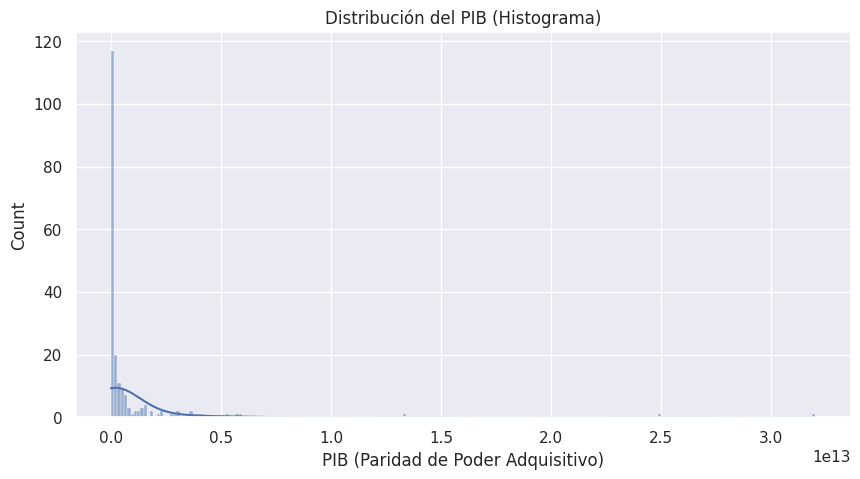

In [19]:
# Visualización de histograma de distribución del PIB

import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc = {'figure.figsize':(10,5)})


plt.figure()
sns.histplot(df_wb['PIB_PPP'], kde=True)
plt.title("Distribución del PIB (Histograma)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

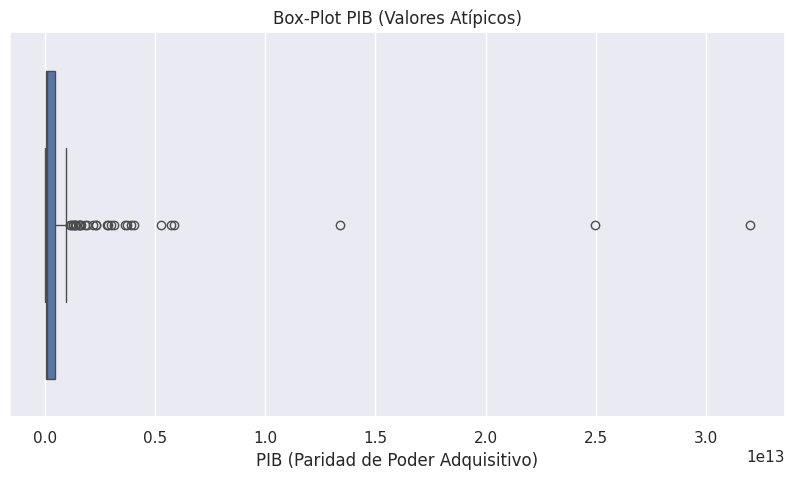

In [20]:
# Visualización del diagrama de caja del PIB
plt.figure()
sns.boxplot(x=df_wb['PIB_PPP']).set_title("Box-Plot PIB (Valores Atípicos)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

La dispersión de los datos ensucia la visualización de los mismos, por lo que se hará una transformación logarítmica

In [21]:
def log_transform_muy_dispersas(
    df: pd.DataFrame,
    cols_excluir=("Country", "Iso"),
    criterio="ratio_p95_p5",
    umbral=50,
    usar_log1p=True,
    renombrar=True
):
    """
    Identifica variables numéricas 'muy dispersas' y las transforma a log.
    Devuelve: (df_transformado, lista_columnas_transformadas, diagnostico)
    """

    df_out = df.copy()

    # Selección de columnas numéricas (excluyendo identificadores)
    num_cols = df_out.select_dtypes(include="number").columns
    num_cols = [c for c in num_cols if c not in cols_excluir]

    if len(num_cols) == 0:
        return df_out, [], pd.DataFrame()

    diag = pd.DataFrame(index=num_cols)

    #  Diagnósticos de dispersión (robustos)
    med = df_out[num_cols].median(numeric_only=True)
    sd = df_out[num_cols].std(numeric_only=True)
    p5 = df_out[num_cols].quantile(0.05, numeric_only=True)
    p95 = df_out[num_cols].quantile(0.95, numeric_only=True)

    diag["median"] = med
    diag["std"] = sd
    diag["p5"] = p5
    diag["p95"] = p95

    # Evitar división por 0
    eps = 1e-9
    diag["ratio_sd_median"] = (sd / (med.abs() + eps)).replace([np.inf, -np.inf], np.nan)
    diag["ratio_p95_p5"] = (p95 / (p5.abs() + eps)).replace([np.inf, -np.inf], np.nan)

    # Selección de columnas muy dispersas según criterio elegido
    if criterio not in diag.columns:
        raise ValueError(f"Criterio '{criterio}' no válido. Usa 'ratio_sd_median' o 'ratio_p95_p5'.")

    cols_muy_dispersas = diag.index[diag[criterio] > umbral].tolist()

    # Transformación log
    cols_transformadas = []
    for c in cols_muy_dispersas:
        s = df_out[c]

        if usar_log1p:

            if (s < 0).any():

                continue
            new = np.log1p(s)
        else:

            if (s <= 0).any():
                continue
            new = np.log(s)

        new_name = f"log_{c}" if renombrar else c
        df_out[new_name] = new
        cols_transformadas.append((c, new_name))

    # eliminar originales
    df_out.drop(columns=[c for c, _ in cols_transformadas], inplace=True)

    return df_out, cols_transformadas, diag.sort_values(by=criterio, ascending=False)


# Identificar y transformar variables muy dispersas usando ratio p95/p5
df_wb_log, cols_log, diagnostico = log_transform_muy_dispersas(
    df_wb,
    cols_excluir=("Country", "Iso"),
    criterio="ratio_p95_p5",
    umbral=50,
    usar_log1p=True,
    renombrar=True
)

print("Columnas transformadas (original -> nueva):")
for orig, new in cols_log:
    print(f"{orig} -> {new}")

# Las más dispersas:
diagnostico.head(15)


Columnas transformadas (original -> nueva):
PIB_PPP -> log_PIB_PPP
Poblacion_Total -> log_Poblacion_Total
Poblacion_Mujeres -> log_Poblacion_Mujeres
Poblacion_Hombres -> log_Poblacion_Hombres
Poblacion_Urbana -> log_Poblacion_Urbana
Fuerza_Laboral_Total -> log_Fuerza_Laboral_Total
Poblacion_Rural -> log_Poblacion_Rural
Valor_Agro_USD -> log_Valor_Agro_USD
Valor_Agro_LCU -> log_Valor_Agro_LCU
Valor_Manufactura_USD -> log_Valor_Manufactura_USD
Valor_Manufactura_LCU -> log_Valor_Manufactura_LCU
Valor_Industria_USD -> log_Valor_Industria_USD
Valor_Industria_LCU -> log_Valor_Industria_LCU
Valor_Servicios_USD -> log_Valor_Servicios_USD
Valor_Servicios_LCU -> log_Valor_Servicios_LCU
Emisiones_CO2_Ind -> log_Emisiones_CO2_Ind
Acceso_Cocina_Limpia_Total_Pct -> log_Acceso_Cocina_Limpia_Total_Pct
Acceso_Cocina_Limpia_Rural_Pct -> log_Acceso_Cocina_Limpia_Rural_Pct


,median,std,p5,p95,ratio_sd_median,ratio_p95_p5
Valor_Agro_LCU,3.977946e+10,1.250933e+15,4.901165e+07,4.416388e+13,31446.701828,901089.314838
Valor_Manufactura_LCU,1.107454e+11,2.504077e+15,6.689390e+07,4.150352e+13,22611.116722,620438.139255
Valor_Industria_LCU,1.969778e+11,4.499758e+15,3.145377e+08,8.184140e+13,22843.986271,260195.816631
Valor_Servicios_LCU,5.241300e+11,5.514183e+15,1.259234e+09,1.556689e+14,10520.641076,123621.881219
Emisiones_CO2_Ind,1.266150e+00,1.058787e+02,5.850000e-04,5.247311e+01,83.622557,89697.470603
Poblacion_Rural,1.983892e+06,7.663858e+07,2.528200e+03,5.933148e+07,38.630430,23467.875603
Valor_Manufactura_USD,4.795877e+09,3.766307e+11,2.794284e+07,2.826844e+11,78.532192,10116.523216
Valor_Industria_USD,1.124417e+10,5.496873e+11,1.039783e+08,5.575062e+11,48.886447,5361.755191
PIB_PPP,8.596764e+10,3.129922e+12,1.408733e+09,3.191064e+12,36.408140,2265.201085
Poblacion_Urbana,4.463172e+06,8.019058e+07,3.716450e+04,7.897682e+07,17.967169,2125.060756


Utilizamos la transformación logaritmica para datos muy dispersos, así obtenemos una correcta visualización de los gráficos de dispersión y podemos aplicar correctamente las siguientes etapas.

El data frame df_wb se mantiene igual
Se crea un nuevo data frame df_wwb_log que fueron reemplazadas las columnas dispersas por una logarítmica.

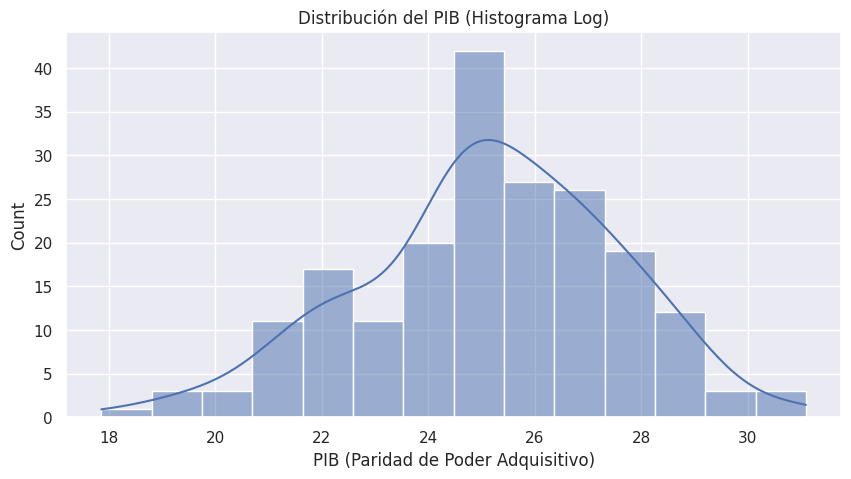

In [22]:
# Visualización de histograma de distribución del PIB


sns.set(rc = {'figure.figsize':(10,5)})


plt.figure()
sns.histplot(df_wb_log['log_PIB_PPP'], kde=True)
plt.title("Distribución del PIB (Histograma Log)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

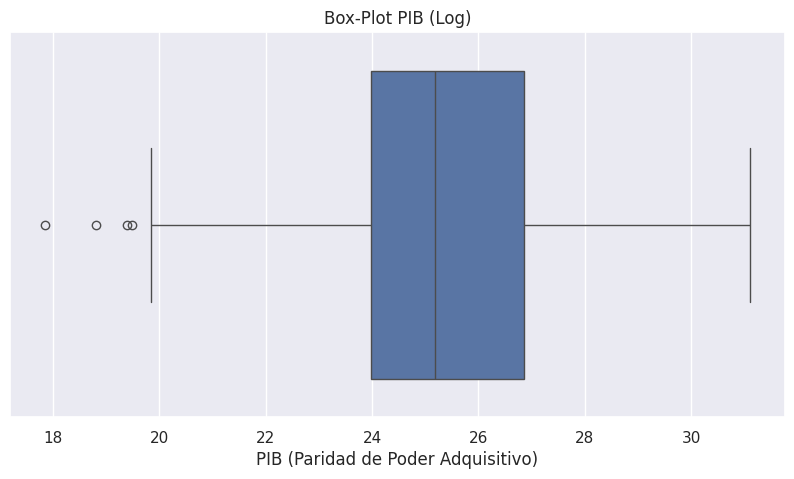

In [23]:
# Visualización del diagrama de caja del PIB
plt.figure()
sns.boxplot(x=df_wb_log['log_PIB_PPP']).set_title("Box-Plot PIB (Log)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

In [24]:
# Visualización de mapa de distribución del PIB sin log

import plotly.express as px


fig = px.choropleth(
    df_wb,
    locations='Iso',
    color='PIB_PPP',
    hover_name='Country',
    projection='natural earth',
    title='Distribución del PIB por Países (PPP)',
    color_continuous_scale=px.colors.sequential.Blues
)

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=24
)


fig.show()

In [25]:
fig = px.choropleth(
    df_wb_log,
    locations='Iso',
    color='log_PIB_PPP',
    hover_name='Country',
    projection='natural earth',
    title='Distribución Logarítmica del PIB por Países (PPP)',
    color_continuous_scale=px.colors.sequential.Blues
)

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=24
)


fig.show()

# Interpretación de los Gráficos: El Efecto de la Transformación

Análisis e Interpretación de Resultados
El análisis de los gráficos presentados permite comprender la estructura económica del dataset y la efectividad de los tratamientos estadísticos aplicados.

1. Análisis de Distribución y Dispersión
A partir de los gráficos de histograma y diagrama de caja (Box-Plot), se evaluó el comportamiento del PIB en paridad de poder adquisitivo. Debido a la alta concentración de la riqueza en pocos países, se calculó la transformación logarítmica de la variable original. Con este procedimiento, se obtuvo una distribución significativamente más equilibrada y cercana a la normalidad, lo que facilita la aplicación de modelos matemáticos. El gráfico de caja confirma que, tras el ajuste, la mayor parte de los países se sitúan en un rango comparable, reduciendo el impacto de las economías extremadamente grandes.

2. Distribución Geográfica en Escala Lineal
En el gráfico de mapa que muestra el PIB en valores brutos, se evidencia una profunda polarización global. Se obtuvo una visualización donde la escala está dominada casi exclusivamente por potencias como Estados Unidos y China, dejando al resto de las naciones en tonalidades muy claras. Esta representación confirma que el uso de datos sin transformar oculta las diferencias reales entre las economías medianas y pequeñas, ya que los valores extremos distorsionan la escala visual.

3. Distribución Geográfica en Escala Logarítmica
Al utilizar la transformación logarítmica en el gráfico cartográfico, se obtuvo una representación mucho más precisa de la realidad económica mundial. Se calculó este ajuste para normalizar las brechas, lo que permitió identificar matices y niveles de desarrollo diferenciados en regiones de América Latina, Europa y África. Esta visualización es más informativa, ya que permite comparar países de distintas escalas sin que los valores atípicos invaliden la observación del conjunto.

**Mediante la aplicación de técnicas de normalización, se puede apreciar un conjunto de datos sólido y metodológicamente consistente. Los gráficos demuestran que el tratamiento logarítmico fue esencial para estabilizar la varianza y garantizar que los análisis posteriores reflejen patrones económicos reales, eliminando distorsiones provocadas por la heterogeneidad extrema del dataset original.**

In [26]:
# Visualización final de los datos
df_wb_log

,Iso,Country,Crecimiento_Poblacional,Poblacion_Mujeres_Pct,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,Poblacion_Urbana_Pct,Fuerza_Laboral_Mujeres_Pct,Desempleo_Mujeres_Pct,Desempleo_Hombres_Pct,...,log_Valor_Agro_LCU,log_Valor_Manufactura_USD,log_Valor_Manufactura_LCU,log_Valor_Industria_USD,log_Valor_Industria_LCU,log_Valor_Servicios_USD,log_Valor_Servicios_LCU,log_Emisiones_CO2_Ind,log_Acceso_Cocina_Limpia_Total_Pct,log_Acceso_Cocina_Limpia_Rural_Pct
1,ABW,Aruba,0.045652,52.769620,47.230380,-0.028616,61.835149,44.221526,10.712757,9.090322,...,21.963672,18.504981,21.852726,19.723384,22.727158,21.421622,24.522604,0.002098,4.507792,4.393765
2,AFG,Afghanistan,2.135594,49.525513,50.474487,2.446706,25.473053,6.846247,26.570000,13.066000,...,26.874615,20.980568,25.346973,21.559190,25.925595,22.796971,27.163376,0.089018,3.678829,3.063391
3,AGO,Angola,3.080655,50.525887,49.474113,4.233833,69.851503,49.450638,14.671000,14.405000,...,30.416323,22.783504,29.377697,24.351524,30.945717,24.525511,31.119704,1.028798,3.935740,2.240710
4,ALB,Albania,-1.543108,50.559226,49.440774,-0.946506,58.210609,44.994435,10.376000,9.888000,...,26.675906,21.249229,25.860829,22.417181,27.028780,23.138921,27.750520,0.598067,4.467057,4.297285
5,AND,Andorra,1.433748,48.854754,51.145246,1.506784,88.820161,42.068992,9.973454,7.123784,...,16.633909,18.672180,18.594046,19.969129,19.890995,21.809847,21.731713,0.002402,4.615121,4.615121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,WSM,Samoa,0.649191,49.657996,50.342004,0.653519,17.501280,36.133533,7.678000,3.450000,...,19.454396,17.731271,18.735755,18.472511,19.476995,20.421000,21.425484,0.001299,3.706228,3.532226
195,XKX,Kosovo,-4.952263,50.812015,49.187985,-2.247748,49.110558,36.516951,17.708069,13.517951,...,20.365083,21.025149,20.946873,21.737745,21.659470,22.307282,22.229006,0.051241,3.336540,2.995247
196,ZAF,South Africa,1.328101,51.353714,48.646286,1.494482,63.582371,46.937722,34.531000,29.946000,...,25.907390,24.625461,27.540539,25.263332,28.178409,26.200741,29.115818,2.959302,4.508659,4.268298
197,ZMB,Zambia,2.794068,50.510204,49.489796,3.753005,45.028585,46.170619,6.207000,5.646000,...,23.243445,21.575527,24.581804,22.993535,25.999813,23.474944,26.481221,0.828770,2.322388,1.193922


In [27]:
#Discretizar la variable dependiente PIB_PPP_log

import pandas as pd

df_desc = df_wb_log.copy()


df_desc['log_PIB_PPP'] = pd.qcut(df_desc['log_PIB_PPP'], q=5,labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


df_desc[['Iso', 'Country', 'log_PIB_PPP']].head()

,Iso,Country,log_PIB_PPP
1,ABW,Aruba,Low
2,AFG,Afghanistan,Medium
3,AGO,Angola,Medium-High
4,ALB,Albania,Medium-Low
5,AND,Andorra,Low


Conclusión de la Etapa I

Al analizar la información, lo primero que notamos es que los países son extremadamente diferentes entre sí. No solo en su economía, sino también en su población y temas sociales. Por ejemplo, la riqueza (el PIB) está muy concentrada: unos pocos países son gigantescos comparados con el resto. Para que estas diferencias no "rompan" el análisis, decidimos agrupar el PIB por categorías en lugar de usar los números brutos. Así, las comparaciones son mucho más justas.

Limpieza y datos faltantes
No todos los países tenían la información completa. Notamos que faltaban muchos datos sobre impuestos y deudas; como el vacío era de más del 15%, decidimos eliminar esas variables para no trabajar con información incompleta.

Para los huecos más pequeños en otras áreas, usamos un método llamado KNN. Básicamente, el sistema busca países similares para "adivinar" el dato faltante de forma inteligente. Es mucho mejor que simplemente poner un promedio, ya que respeta la realidad de cada nación.

Ajustes estadísticos
Muchos datos (como la población o el tamaño de la economía) tenían valores exageradamente altos que hacían que las gráficas se vieran desequilibradas. Para solucionar esto, aplicamos transformaciones logarítmicas. Esto nos ayuda a "suavizar" los números y estabilizarlos, permitiendo que podamos comparar a un país pequeño con uno grande de forma más equilibrada.

# Guardo la nueva base de datos en Drive


In [1]:
# Conexión con el Almacenamiento en la Nube
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Guardo mi data en Drive
df_desc.to_csv('/content/drive/My Drive/datos_world_bank.csv', index=False)

In [32]:
df_desc.columns

Index(['Iso', 'Country', 'Crecimiento_Poblacional', 'Poblacion_Mujeres_Pct',
       'Poblacion_Hombres_Pct', 'Crecimiento_Pob_Urbana',
       'Poblacion_Urbana_Pct', 'Fuerza_Laboral_Mujeres_Pct',
       'Desempleo_Mujeres_Pct', 'Desempleo_Hombres_Pct',
       'Crecimiento_Pob_Rural', 'Poblacion_Rural_Pct', 'Inflacion_Anual',
       'Exportaciones_Pct_PIB', 'Desempleo_Total_Pct', 'Efectividad_Gobierno',
       'IED_Salida_Neta', 'IED_Entrada_Pct_PIB', 'Esperanza_Vida_Mujeres',
       'Esperanza_Vida_Total', 'Esperanza_Vida_Hombres',
       'Acceso_Cocina_Limpia_Urbano_Pct', 'Uso_Internet_Pct', 'log_PIB_PPP',
       'log_Poblacion_Total', 'log_Poblacion_Mujeres', 'log_Poblacion_Hombres',
       'log_Poblacion_Urbana', 'log_Fuerza_Laboral_Total',
       'log_Poblacion_Rural', 'log_Valor_Agro_USD', 'log_Valor_Agro_LCU',
       'log_Valor_Manufactura_USD', 'log_Valor_Manufactura_LCU',
       'log_Valor_Industria_USD', 'log_Valor_Industria_LCU',
       'log_Valor_Servicios_USD', 'log_Valor_S

In [31]:
df_wb.columns

Index(['Iso', 'Country', 'PIB_PPP', 'Crecimiento_Poblacional',
       'Poblacion_Total', 'Poblacion_Mujeres', 'Poblacion_Mujeres_Pct',
       'Poblacion_Hombres', 'Poblacion_Hombres_Pct', 'Crecimiento_Pob_Urbana',
       'Poblacion_Urbana', 'Poblacion_Urbana_Pct',
       'Fuerza_Laboral_Mujeres_Pct', 'Fuerza_Laboral_Total',
       'Desempleo_Mujeres_Pct', 'Desempleo_Hombres_Pct', 'Poblacion_Rural',
       'Crecimiento_Pob_Rural', 'Poblacion_Rural_Pct', 'Inflacion_Anual',
       'Exportaciones_Pct_PIB', 'Valor_Agro_USD', 'Valor_Agro_LCU',
       'Valor_Manufactura_USD', 'Desempleo_Total_Pct', 'Efectividad_Gobierno',
       'Valor_Manufactura_LCU', 'Valor_Industria_USD', 'Valor_Industria_LCU',
       'Valor_Servicios_USD', 'Valor_Servicios_LCU', 'IED_Salida_Neta',
       'IED_Entrada_Pct_PIB', 'Emisiones_CO2_Ind',
       'Acceso_Cocina_Limpia_Total_Pct', 'Esperanza_Vida_Mujeres',
       'Esperanza_Vida_Total', 'Esperanza_Vida_Hombres',
       'Acceso_Cocina_Limpia_Rural_Pct', 'Acceso_Coc